获取前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., 100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

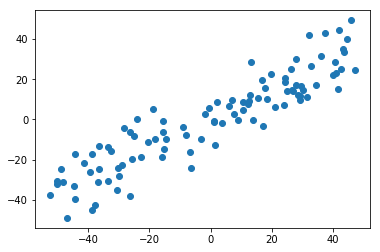

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X)-f(last_w, X)) < epsilon):
            break
        
        cur_iter += 1
        
    return w